In [7]:
#%matplotlib inline 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
import hmmlearn.hmm  as hmm
import warnings
style.use('ggplot')

warnings.filterwarnings('ignore')
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2017, 12, 25)

df = web.DataReader('AAPL', 'yahoo', start, end)#.reset_index()

In [8]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
#df.dropna(inplace=True)
# check missing
df.count()
num_rows = df.shape[0]
num_missing = num_rows - df.count()
print(num_missing)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
100ma        0
dtype: int64


## Resample

In [9]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

In [10]:
df_volume.index.map(mdates.date2num)

Float64Index([733776.0, 733786.0, 733796.0, 733806.0, 733816.0, 733826.0,
              733836.0, 733846.0, 733856.0, 733866.0,
              ...
              736596.0, 736606.0, 736616.0, 736626.0, 736636.0, 736646.0,
              736656.0, 736666.0, 736676.0, 736686.0],
             dtype='float64', name='Date', length=292)

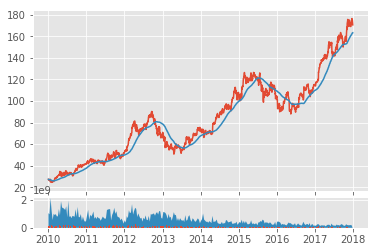

In [12]:
%matplotlib inline
ax1 =  plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 =  plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax1.xaxis_date()
ax2.bar(df.index, df['Volume'])
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)